In [1]:
import glob
from netCDF4 import Dataset
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [29]:
all_years = []
for file in glob.glob('Dataset_Raw/79-83/*.nc'):
    print(file[18:22] +" -> This is the year")
    data = Dataset(file, 'r')
    #print(data)
    time = data.variables['time']
    print(time)
    year = file[18:22]
    all_years.append(year)

1982 -> This is the year
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: verification time generated by wgrib2 function verftime()
    units: seconds since 1970-01-01 00:00:00.0 0:00
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (365,)
filling off
1980 -> This is the year
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: verification time generated by wgrib2 function verftime()
    units: seconds since 1970-01-01 00:00:00.0 0:00
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (336,)
filling off
1983 -> This is the year
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: verification time generated by wgrib2 function verftime()
    units: seconds since 1970-01-01 00:00:00.0 0:00
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (365,)
filling off
1979 -> This is the ye

In [30]:
year_start = min(all_years)
year_end = max(all_years)
print(year_start)
print(year_end)

1979
1983


In [14]:
date_range = pd.date_range(start = year_start + '-01-01', end=year_end + '-12-31', freq='D' )
df = pd.DataFrame(0.0, columns=['Temperature'], index=date_range)

In [15]:
df

,Temperature
1979-01-01,0.0
1979-01-02,0.0
1979-01-03,0.0
1979-01-04,0.0
1979-01-05,0.0
...,...
1983-12-27,0.0
1983-12-28,0.0
1983-12-29,0.0
1983-12-30,0.0


In [16]:
#defining lat and lon for the location
lat = 28.7041
lon = 77.1025

In [31]:
all_years.sort()

In [32]:
all_years

['1979', '1980', '1981', '1982', '1983']

In [38]:
for yr in all_years:
    # reading in the data
    data = Dataset('Dataset_Raw/79-83/' + yr + '.nc', 'r')
    
    # store the latitude and longitude data from the dataset
    latitude = data.variables['latitude'][:]
    longitude = data.variables['longitude'][:]
    
    #squared difference between the specified latitude and longitude 
    sq_diff_lat = (latitude - lat)**2
    sq_diff_lon = (longitude - lon)**2
    
    #identify the index of hte minimum  value for lat and lon
    min_index_lat  = sq_diff_lat.argmin()
    min_index_lon  = sq_diff_lon.argmin()
    
    # accessing the temperature data
    temp = data.variables['TMP_2m']
    
    # creating the date range for each year
    start = str(yr) + '-01-01'
    end = str(yr) + '-12-31'
    d_range = pd.date_range(start=start, end = end , freq='D')
    length = data.variables['TMP_2m'].shape[0]
    for t_index in np.arange(length):
        print('Recording the value for :'+str(d_range[t_index]))
        df.loc[d_range[t_index]]['Temperature'] = temp[t_index , min_index_lat, min_index_lon]

Recording the value for :1979-01-01 00:00:00
Recording the value for :1979-01-02 00:00:00
Recording the value for :1979-01-03 00:00:00
Recording the value for :1979-01-04 00:00:00
Recording the value for :1979-01-05 00:00:00
Recording the value for :1979-01-06 00:00:00
Recording the value for :1979-01-07 00:00:00
Recording the value for :1979-01-08 00:00:00
Recording the value for :1979-01-09 00:00:00
Recording the value for :1979-01-10 00:00:00
Recording the value for :1979-01-11 00:00:00
Recording the value for :1979-01-12 00:00:00
Recording the value for :1979-01-13 00:00:00
Recording the value for :1979-01-14 00:00:00
Recording the value for :1979-01-15 00:00:00
Recording the value for :1979-01-16 00:00:00
Recording the value for :1979-01-17 00:00:00
Recording the value for :1979-01-18 00:00:00
Recording the value for :1979-01-19 00:00:00
Recording the value for :1979-01-20 00:00:00
Recording the value for :1979-01-21 00:00:00
Recording the value for :1979-01-22 00:00:00
Recording 

Recording the value for :1979-07-18 00:00:00
Recording the value for :1979-07-19 00:00:00
Recording the value for :1979-07-20 00:00:00
Recording the value for :1979-07-21 00:00:00
Recording the value for :1979-07-22 00:00:00
Recording the value for :1979-07-23 00:00:00
Recording the value for :1979-07-24 00:00:00
Recording the value for :1979-07-25 00:00:00
Recording the value for :1979-07-26 00:00:00
Recording the value for :1979-07-27 00:00:00
Recording the value for :1979-07-28 00:00:00
Recording the value for :1979-07-29 00:00:00
Recording the value for :1979-07-30 00:00:00
Recording the value for :1979-07-31 00:00:00
Recording the value for :1979-08-01 00:00:00
Recording the value for :1979-08-02 00:00:00
Recording the value for :1979-08-03 00:00:00
Recording the value for :1979-08-04 00:00:00
Recording the value for :1979-08-05 00:00:00
Recording the value for :1979-08-06 00:00:00
Recording the value for :1979-08-07 00:00:00
Recording the value for :1979-08-08 00:00:00
Recording 

Recording the value for :1980-02-25 00:00:00
Recording the value for :1980-02-26 00:00:00
Recording the value for :1980-02-27 00:00:00
Recording the value for :1980-02-28 00:00:00
Recording the value for :1980-02-29 00:00:00
Recording the value for :1980-03-01 00:00:00
Recording the value for :1980-03-02 00:00:00
Recording the value for :1980-03-03 00:00:00
Recording the value for :1980-03-04 00:00:00
Recording the value for :1980-03-05 00:00:00
Recording the value for :1980-03-06 00:00:00
Recording the value for :1980-03-07 00:00:00
Recording the value for :1980-03-08 00:00:00
Recording the value for :1980-03-09 00:00:00
Recording the value for :1980-03-10 00:00:00
Recording the value for :1980-03-11 00:00:00
Recording the value for :1980-03-12 00:00:00
Recording the value for :1980-03-13 00:00:00
Recording the value for :1980-03-14 00:00:00
Recording the value for :1980-03-15 00:00:00
Recording the value for :1980-03-16 00:00:00
Recording the value for :1980-03-17 00:00:00
Recording 

Recording the value for :1980-09-16 00:00:00
Recording the value for :1980-09-17 00:00:00
Recording the value for :1980-09-18 00:00:00
Recording the value for :1980-09-19 00:00:00
Recording the value for :1980-09-20 00:00:00
Recording the value for :1980-09-21 00:00:00
Recording the value for :1980-09-22 00:00:00
Recording the value for :1980-09-23 00:00:00
Recording the value for :1980-09-24 00:00:00
Recording the value for :1980-09-25 00:00:00
Recording the value for :1980-09-26 00:00:00
Recording the value for :1980-09-27 00:00:00
Recording the value for :1980-09-28 00:00:00
Recording the value for :1980-09-29 00:00:00
Recording the value for :1980-09-30 00:00:00
Recording the value for :1980-10-01 00:00:00
Recording the value for :1980-10-02 00:00:00
Recording the value for :1980-10-03 00:00:00
Recording the value for :1980-10-04 00:00:00
Recording the value for :1980-10-05 00:00:00
Recording the value for :1980-10-06 00:00:00
Recording the value for :1980-10-07 00:00:00
Recording 

Recording the value for :1981-05-01 00:00:00
Recording the value for :1981-05-02 00:00:00
Recording the value for :1981-05-03 00:00:00
Recording the value for :1981-05-04 00:00:00
Recording the value for :1981-05-05 00:00:00
Recording the value for :1981-05-06 00:00:00
Recording the value for :1981-05-07 00:00:00
Recording the value for :1981-05-08 00:00:00
Recording the value for :1981-05-09 00:00:00
Recording the value for :1981-05-10 00:00:00
Recording the value for :1981-05-11 00:00:00
Recording the value for :1981-05-12 00:00:00
Recording the value for :1981-05-13 00:00:00
Recording the value for :1981-05-14 00:00:00
Recording the value for :1981-05-15 00:00:00
Recording the value for :1981-05-16 00:00:00
Recording the value for :1981-05-17 00:00:00
Recording the value for :1981-05-18 00:00:00
Recording the value for :1981-05-19 00:00:00
Recording the value for :1981-05-20 00:00:00
Recording the value for :1981-05-21 00:00:00
Recording the value for :1981-05-22 00:00:00
Recording 

Recording the value for :1981-11-07 00:00:00
Recording the value for :1981-11-08 00:00:00
Recording the value for :1981-11-09 00:00:00
Recording the value for :1981-11-10 00:00:00
Recording the value for :1981-11-11 00:00:00
Recording the value for :1981-11-12 00:00:00
Recording the value for :1981-11-13 00:00:00
Recording the value for :1981-11-14 00:00:00
Recording the value for :1981-11-15 00:00:00
Recording the value for :1981-11-16 00:00:00
Recording the value for :1981-11-17 00:00:00
Recording the value for :1981-11-18 00:00:00
Recording the value for :1981-11-19 00:00:00
Recording the value for :1981-11-20 00:00:00
Recording the value for :1981-11-21 00:00:00
Recording the value for :1981-11-22 00:00:00
Recording the value for :1981-11-23 00:00:00
Recording the value for :1981-11-24 00:00:00
Recording the value for :1981-11-25 00:00:00
Recording the value for :1981-11-26 00:00:00
Recording the value for :1981-11-27 00:00:00
Recording the value for :1981-11-28 00:00:00
Recording 

Recording the value for :1982-05-17 00:00:00
Recording the value for :1982-05-18 00:00:00
Recording the value for :1982-05-19 00:00:00
Recording the value for :1982-05-20 00:00:00
Recording the value for :1982-05-21 00:00:00
Recording the value for :1982-05-22 00:00:00
Recording the value for :1982-05-23 00:00:00
Recording the value for :1982-05-24 00:00:00
Recording the value for :1982-05-25 00:00:00
Recording the value for :1982-05-26 00:00:00
Recording the value for :1982-05-27 00:00:00
Recording the value for :1982-05-28 00:00:00
Recording the value for :1982-05-29 00:00:00
Recording the value for :1982-05-30 00:00:00
Recording the value for :1982-05-31 00:00:00
Recording the value for :1982-06-01 00:00:00
Recording the value for :1982-06-02 00:00:00
Recording the value for :1982-06-03 00:00:00
Recording the value for :1982-06-04 00:00:00
Recording the value for :1982-06-05 00:00:00
Recording the value for :1982-06-06 00:00:00
Recording the value for :1982-06-07 00:00:00
Recording 

Recording the value for :1982-11-22 00:00:00
Recording the value for :1982-11-23 00:00:00
Recording the value for :1982-11-24 00:00:00
Recording the value for :1982-11-25 00:00:00
Recording the value for :1982-11-26 00:00:00
Recording the value for :1982-11-27 00:00:00
Recording the value for :1982-11-28 00:00:00
Recording the value for :1982-11-29 00:00:00
Recording the value for :1982-11-30 00:00:00
Recording the value for :1982-12-01 00:00:00
Recording the value for :1982-12-02 00:00:00
Recording the value for :1982-12-03 00:00:00
Recording the value for :1982-12-04 00:00:00
Recording the value for :1982-12-05 00:00:00
Recording the value for :1982-12-06 00:00:00
Recording the value for :1982-12-07 00:00:00
Recording the value for :1982-12-08 00:00:00
Recording the value for :1982-12-09 00:00:00
Recording the value for :1982-12-10 00:00:00
Recording the value for :1982-12-11 00:00:00
Recording the value for :1982-12-12 00:00:00
Recording the value for :1982-12-13 00:00:00
Recording 

Recording the value for :1983-06-10 00:00:00
Recording the value for :1983-06-11 00:00:00
Recording the value for :1983-06-12 00:00:00
Recording the value for :1983-06-13 00:00:00
Recording the value for :1983-06-14 00:00:00
Recording the value for :1983-06-15 00:00:00
Recording the value for :1983-06-16 00:00:00
Recording the value for :1983-06-17 00:00:00
Recording the value for :1983-06-18 00:00:00
Recording the value for :1983-06-19 00:00:00
Recording the value for :1983-06-20 00:00:00
Recording the value for :1983-06-21 00:00:00
Recording the value for :1983-06-22 00:00:00
Recording the value for :1983-06-23 00:00:00
Recording the value for :1983-06-24 00:00:00
Recording the value for :1983-06-25 00:00:00
Recording the value for :1983-06-26 00:00:00
Recording the value for :1983-06-27 00:00:00
Recording the value for :1983-06-28 00:00:00
Recording the value for :1983-06-29 00:00:00
Recording the value for :1983-06-30 00:00:00
Recording the value for :1983-07-01 00:00:00
Recording 

Recording the value for :1983-12-18 00:00:00
Recording the value for :1983-12-19 00:00:00
Recording the value for :1983-12-20 00:00:00
Recording the value for :1983-12-21 00:00:00
Recording the value for :1983-12-22 00:00:00
Recording the value for :1983-12-23 00:00:00
Recording the value for :1983-12-24 00:00:00
Recording the value for :1983-12-25 00:00:00
Recording the value for :1983-12-26 00:00:00
Recording the value for :1983-12-27 00:00:00
Recording the value for :1983-12-28 00:00:00
Recording the value for :1983-12-29 00:00:00
Recording the value for :1983-12-30 00:00:00
Recording the value for :1983-12-31 00:00:00


In [45]:
len(df[df['Temperature'] == 0])

60

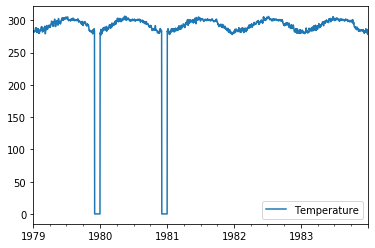

In [46]:
df.plot()

In [47]:
newdf = df

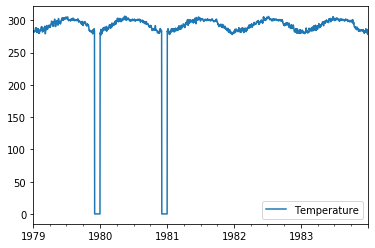

In [49]:
newdf.plot()

In [53]:
newdf['Temperature'][0]

282.6611022949219

In [55]:
kdf = newdf.replace(to_replace = 0 , value = 282)

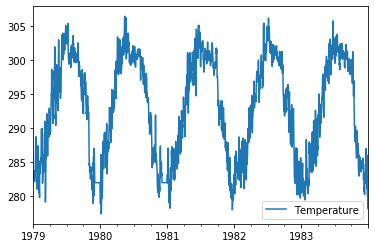

In [56]:
kdf.plot()

First, we have to convert the temperature values to Degree celsius

In [57]:
def conv_to_celsius(x):
    return x - 273.15


In [59]:
celsiusDf = kdf['Temperature'].apply(conv_to_celsius)

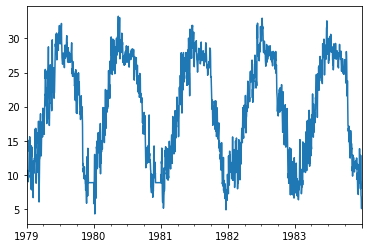

In [61]:
celsiusDf.to_csv('Delhi_Temp_1979_1983.csv')
celsiusDf.plot()

Now, we have to load the monthly average data of these years and then subtract the average values to get the anomalies for each day

In [62]:
year_start = min(all_years)
year_end = max(all_years)
print(year_start)
print(year_end)
date_range = pd.date_range(start = year_start + '-01-01', end=year_end + '-12-31', freq='M' )
df_avg = pd.DataFrame(0.0, columns=['Temperature'], index=date_range)

1979
1983


In [63]:
df_avg

,Temperature
1979-01-31,0.0
1979-02-28,0.0
1979-03-31,0.0
1979-04-30,0.0
1979-05-31,0.0
1979-06-30,0.0
1979-07-31,0.0
1979-08-31,0.0
1979-09-30,0.0
1979-10-31,0.0


In [64]:
data = Dataset('Dataset_Raw/All years Avg month/ncum_imdaa_reanl_MH_TMP-2m_1979010100-1979120100.nc')

In [68]:
data.variables['TMP_2m']

<class 'netCDF4._netCDF4.Variable'>
float32 TMP_2m(time, latitude, longitude)
    long_name: Temperature
    units: K
    _FillValue: 9.999e+20
    missing_value: 9.999e+20
    short_name: TMP_2maboveground
    level: 2 m above ground
unlimited dimensions: time
current shape = (12, 501, 751)
filling off

In [69]:
data.variables['TMP_2m'].shape[0]

12

In [70]:
for yr in all_years:
    # reading in the data
    data = Dataset('Dataset_Raw/All years Avg month/ncum_imdaa_reanl_MH_TMP-2m_' + yr +'010100-'+yr+ '120100.nc', 'r')
    
    # store the latitude and longitude data from the dataset
    latitude = data.variables['latitude'][:]
    longitude = data.variables['longitude'][:]
    
    #squared difference between the specified latitude and longitude 
    sq_diff_lat = (latitude - lat)**2
    sq_diff_lon = (longitude - lon)**2
    
    #identify the index of hte minimum  value for lat and lon
    min_index_lat  = sq_diff_lat.argmin()
    min_index_lon  = sq_diff_lon.argmin()
    
    # accessing the temperature data
    temp = data.variables['TMP_2m']
    
    # creating the date range for each year
    start = str(yr) + '-01-01'
    end = str(yr) + '-12-31'
    d_range = pd.date_range(start=start, end = end , freq='M')
    length = data.variables['TMP_2m'].shape[0]
    for t_index in np.arange(length):
        print('Recording the value for :'+str(d_range[t_index]))
        df_avg.loc[d_range[t_index]]['Temperature'] = temp[t_index , min_index_lat, min_index_lon]

Recording the value for :1979-01-31 00:00:00
Recording the value for :1979-02-28 00:00:00
Recording the value for :1979-03-31 00:00:00
Recording the value for :1979-04-30 00:00:00
Recording the value for :1979-05-31 00:00:00
Recording the value for :1979-06-30 00:00:00
Recording the value for :1979-07-31 00:00:00
Recording the value for :1979-08-31 00:00:00
Recording the value for :1979-09-30 00:00:00
Recording the value for :1979-10-31 00:00:00
Recording the value for :1979-11-30 00:00:00
Recording the value for :1979-12-31 00:00:00
Recording the value for :1980-01-31 00:00:00
Recording the value for :1980-02-29 00:00:00
Recording the value for :1980-03-31 00:00:00
Recording the value for :1980-04-30 00:00:00
Recording the value for :1980-05-31 00:00:00
Recording the value for :1980-06-30 00:00:00
Recording the value for :1980-07-31 00:00:00
Recording the value for :1980-08-31 00:00:00
Recording the value for :1980-09-30 00:00:00
Recording the value for :1980-10-31 00:00:00
Recording 

In [71]:
df_avg

,Temperature
1979-01-31,284.187622
1979-02-28,284.690887
1979-03-31,287.660339
1979-04-30,294.553619
1979-05-31,295.995209
1979-06-30,301.839355
1979-07-31,301.551331
1979-08-31,300.897278
1979-09-30,297.467407
1979-10-31,294.149170


In [74]:
celsiusAvgDf = df_avg['Temperature'].apply(conv_to_celsius)

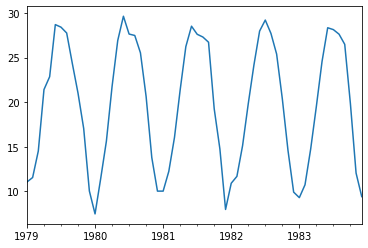

In [75]:
celsiusAvgDf.plot()

Now, we have to create the anomalous time series

In [150]:
date_range = pd.date_range(start = year_start + '-01-01', end=year_end + '-12-31', freq='D' )
df_allavg = pd.DataFrame(0.0, columns=['Temperature'], index=date_range)

In [144]:
celDF = pd.DataFrame(celsiusDf)
celDFavg = pd.DataFrame(celsiusAvgDf)

In [145]:
def to_string(x):
    if x < 10:
        k = '0' + str(x)
        return k
    else:
        k = str(x)
        return k

In [152]:
k = 0
for yr in range(1979, 1984):
    for month in range(1,13):
        val = celDFavg['Temperature'][k]
        k = k + 1
        # fill all the values of this yr and month in df_allavg as val
        for day in range(1,32):
            date = str(yr) + '-' + to_string(month) + '-'+to_string(day)
            correctDate = None
            try:
                newDate = datetime.datetime(yr,month,day)
                correctDate = True
            except ValueError:
                correctDate = False
            if correctDate:
                df_allavg['Temperature'][date] = val

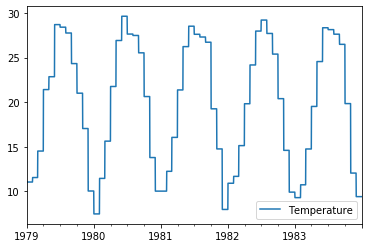

In [136]:
df_allavg.plot()

In [153]:
anomaly = celDF - df_allavg

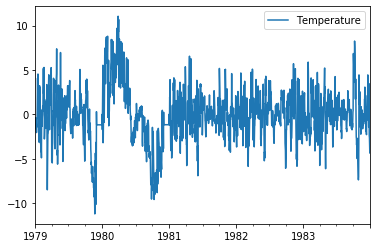

In [154]:
anomaly.plot()

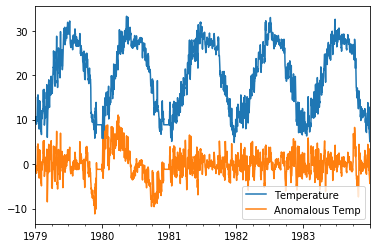

In [157]:
ax = celDF.plot()
anomaly.plot(ax=ax)

In [156]:
anomaly.rename(columns = {'Temperature':'Anomalous Temp'}, inplace = True)

In [158]:
anomaly.to_csv('Delhi_Temp_1979_1983_anomaly.csv')

In [162]:
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
import seaborn as sns


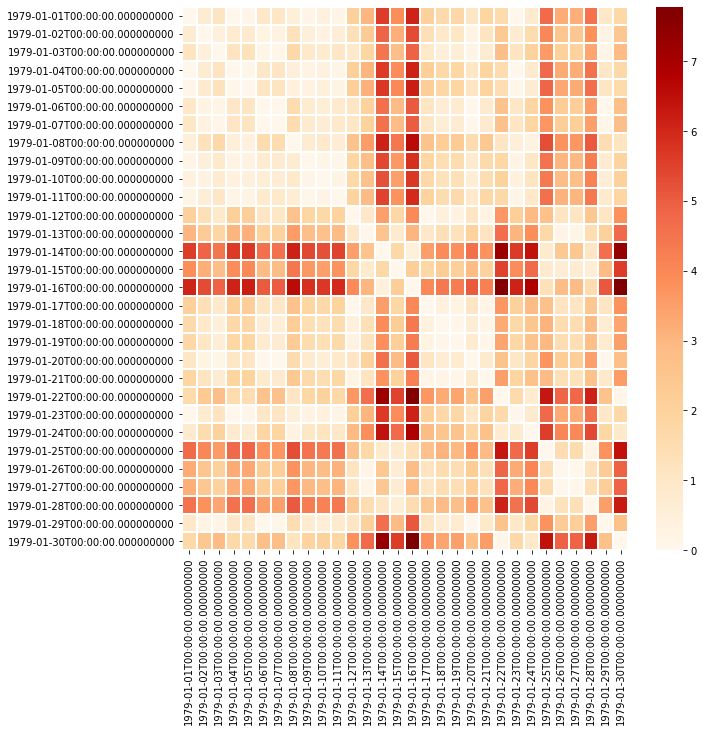

In [167]:

dist = pd.DataFrame(distance_matrix(anomaly[0:30].values, anomaly[0:30].values), index=anomaly[0:30].index, columns=anomaly[0:30].index)
plt.figure(figsize=(10,10))
sns.heatmap(
    dist,
    cmap='OrRd',linewidth=1)

In [168]:
dist = pd.DataFrame(distance_matrix(anomaly.values, anomaly.values), index=anomaly.index, columns=anomaly.index)


In [170]:
dist

,1979-01-01,1979-01-02,1979-01-03,1979-01-04,1979-01-05,1979-01-06,1979-01-07,1979-01-08,1979-01-09,1979-01-10,...,1983-12-22,1983-12-23,1983-12-24,1983-12-25,1983-12-26,1983-12-27,1983-12-28,1983-12-29,1983-12-30,1983-12-31
1979-01-01,0.000000,0.724884,1.151489,0.031464,0.106415,0.998749,1.041595,0.523529,0.211090,0.374786,...,0.910004,1.204254,0.100464,4.987518,2.173920,0.877197,1.102905,2.102234,2.834229,1.676849
1979-01-02,0.724884,0.000000,0.426605,0.756348,0.831299,0.273865,0.316711,1.248413,0.513794,0.350098,...,0.185120,0.479370,0.624420,4.262634,1.449036,1.602081,1.827789,2.827118,3.559113,2.401733
1979-01-03,1.151489,0.426605,0.000000,1.182953,1.257904,0.152740,0.109894,1.675018,0.940399,0.776703,...,0.241486,0.052765,1.051025,3.836029,1.022430,2.028687,2.254395,3.253723,3.985718,2.828339
1979-01-04,0.031464,0.756348,1.182953,0.000000,0.074951,1.030212,1.073059,0.492065,0.242554,0.406250,...,0.941467,1.235718,0.131927,5.018982,2.205383,0.845734,1.071442,2.070770,2.802765,1.645386
1979-01-05,0.106415,0.831299,1.257904,0.074951,0.000000,1.105164,1.148010,0.417114,0.317505,0.481201,...,1.016418,1.310669,0.206879,5.093933,2.280334,0.770782,0.996490,1.995819,2.727814,1.570435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983-12-27,0.877197,1.602081,2.028687,0.845734,0.770782,1.875946,1.918793,0.353668,1.088287,1.251984,...,1.787201,2.081451,0.977661,5.864716,3.051117,0.000000,0.225708,1.225037,1.957031,0.799652
1983-12-28,1.102905,1.827789,2.254395,1.071442,0.996490,2.101654,2.144501,0.579376,1.313995,1.477692,...,2.012909,2.307159,1.203369,6.090424,3.276825,0.225708,0.000000,0.999329,1.731323,0.573944
1983-12-29,2.102234,2.827118,3.253723,2.070770,1.995819,3.100983,3.143829,1.578705,2.313324,2.477020,...,3.012238,3.306488,2.202698,7.089752,4.276154,1.225037,0.999329,0.000000,0.731995,0.425385
1983-12-30,2.834229,3.559113,3.985718,2.802765,2.727814,3.832977,3.875824,2.310699,3.045319,3.209015,...,3.744232,4.038483,2.934692,7.821747,5.008148,1.957031,1.731323,0.731995,0.000000,1.157379


In [171]:
X = np.array(anomaly['Anomalous Temp'])

In [179]:
absX = X - np.min(X)

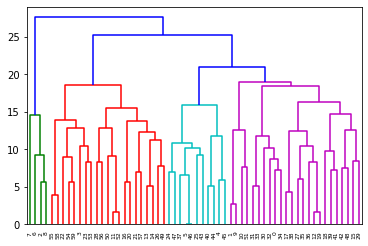

In [182]:
dendrogram = sch.dendrogram(sch.linkage(absX[0:1770],method='ward'))

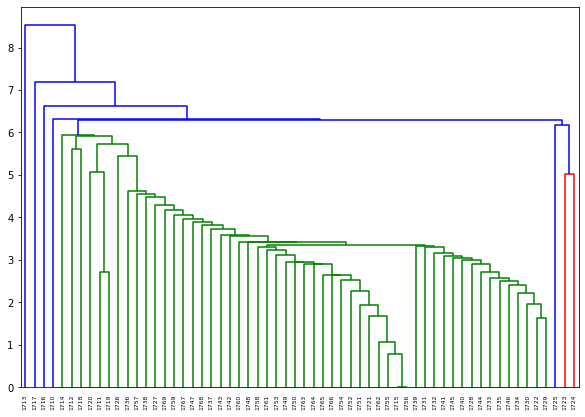

In [183]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(absX[0:1770], 'single')

labelList = range(1, 1770)

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top',labels=labelList, distance_sort='descending')
plt.show()


In [184]:
Dt = np.zeros(3540).reshape(1770, 2)
for i in range(1770):
    Dt[i][0] = i + 1
    Dt[i][1] = X[i]

In [185]:
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster.fit_predict(Dt)

array([6, 6, 6, ..., 7, 7, 7])

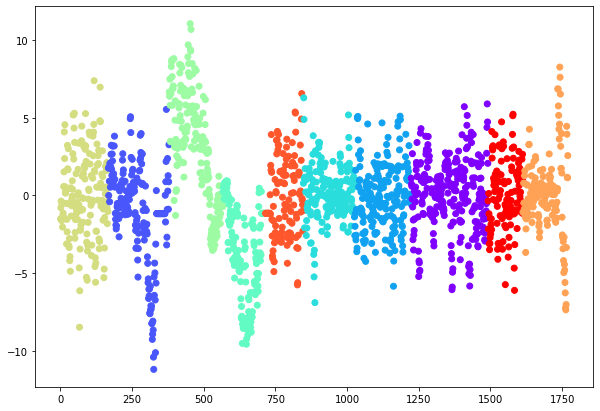

In [186]:
plt.figure(figsize=(10, 7))
plt.scatter(Dt[:,0], Dt[:,1], c=cluster.labels_, cmap='rainbow')

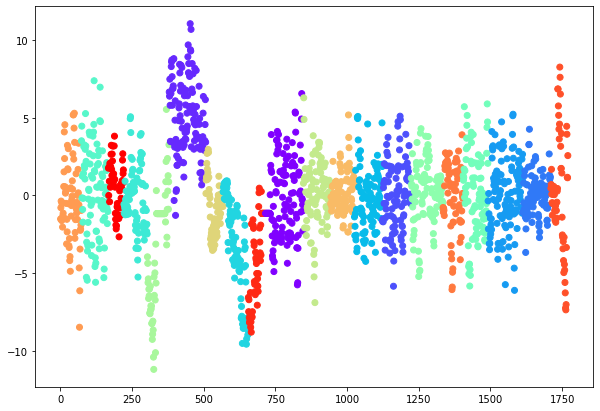

In [187]:
cluster = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward')
cluster.fit_predict(Dt)
plt.figure(figsize=(10, 7))
plt.scatter(Dt[:,0], Dt[:,1], c=cluster.labels_, cmap='rainbow')